In [3]:
!pip install -q kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"arshiahoseinmardy","key":"299dc93fa503d8da727f0a8dad91b21f"}'}

In [5]:
#Make a directory named kaggle and copy the kaggle.json file there.
!mkdir -p ~/.kaggle


In [ ]:
!cp kaggle.json ~/.kaggle/
# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d corrieaar/apartment-rental-offers-in-germany

apartment-rental-offers-in-germany.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
from zipfile import ZipFile
file_name = 'apartment-rental-offers-in-germany.zip' #the file is your dataset exact name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [9]:
import pandas as pd

In [10]:
dfp = pd.read_csv('immo_data.csv')

**install DASK**

In [11]:
!python -m pip install "dask[complete"]

In [12]:
import dask 
import dask.dataframe as dd

In [13]:
ddf = dd.from_pandas(dfp,npartitions = 1)

In [14]:
ddf.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 49 entries, regio1 to date
dtypes: object(19), bool(6), float64(18), int64(6)

# data info

In [15]:
dfp.head(10)

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20
5,Schleswig_Holstein,142.00,gas_heating,NONE,NaN,False,True,5,4.48,2.4,...,Schleswig_Flensburg_Kreis,Struxdorf,NaN,"helle ebenerdige 2 Zi. Wohnung mit Terrasse, h...",NaN,NaN,NaN,NaN,NaN,Feb20
6,Sachsen,70.00,self_contained_central_heating,ONE_YEAR_FREE,10.0,False,False,9,1.01,2.4,...,Mittelsachsen_Kreis,Freiberg,Am Bahnhof 14 in Freiberg\nHeizkosten und Warm...,NaN,NaN,NaN,NaN,NaN,NaN,Feb20
7,Bremen,88.00,central_heating,ONE_YEAR_FREE,10.0,False,True,5,1.89,2.4,...,Bremen,St._Magnus,+ Komfortabler Bodenbelag: Die Wohnung ist zus...,Rollläden; Warmwasserbereiter; Kellerraum; Gas...,44.00,B,NaN,NaN,NaN,Feb20
8,Baden_Württemberg,110.00,oil_heating,ONE_YEAR_FREE,NaN,False,False,5,3.77,40.0,...,Emmendingen_Kreis,Denzlingen,"Diese ansprechende, lichtdurchflutete DG-Wohnu...","Parkett, Einbauküche, kein Balkon",NaN,E,NaN,NaN,NaN,Feb20
9,Nordrhein_Westfalen,95.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,False,7,1.92,40.0,...,Gelsenkirchen,Bulmke_Hüllen,Sie sind auf der Suche nach einer gepflegten u...,In Ihrem neuen Zuhause können Sie nach wenigen...,NaN,NaN,NaN,NaN,NaN,Oct19


In [16]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [17]:
dfp.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,...,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,...,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,...,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,...,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,...,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,...,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,...,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,...,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


# clean Data

drop columns that has no use for us 

In [18]:
ddf.head(15)

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20
5,Schleswig_Holstein,142.00,gas_heating,NONE,NaN,False,True,5,4.48,2.4,...,Schleswig_Flensburg_Kreis,Struxdorf,NaN,"helle ebenerdige 2 Zi. Wohnung mit Terrasse, h...",NaN,NaN,NaN,NaN,NaN,Feb20
6,Sachsen,70.00,self_contained_central_heating,ONE_YEAR_FREE,10.0,False,False,9,1.01,2.4,...,Mittelsachsen_Kreis,Freiberg,Am Bahnhof 14 in Freiberg\nHeizkosten und Warm...,NaN,NaN,NaN,NaN,NaN,NaN,Feb20
7,Bremen,88.00,central_heating,ONE_YEAR_FREE,10.0,False,True,5,1.89,2.4,...,Bremen,St._Magnus,+ Komfortabler Bodenbelag: Die Wohnung ist zus...,Rollläden; Warmwasserbereiter; Kellerraum; Gas...,44.00,B,NaN,NaN,NaN,Feb20
8,Baden_Württemberg,110.00,oil_heating,ONE_YEAR_FREE,NaN,False,False,5,3.77,40.0,...,Emmendingen_Kreis,Denzlingen,"Diese ansprechende, lichtdurchflutete DG-Wohnu...","Parkett, Einbauküche, kein Balkon",NaN,E,NaN,NaN,NaN,Feb20
9,Nordrhein_Westfalen,95.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,False,7,1.92,40.0,...,Gelsenkirchen,Bulmke_Hüllen,Sie sind auf der Suche nach einer gepflegten u...,In Ihrem neuen Zuhause können Sie nach wenigen...,NaN,NaN,NaN,NaN,NaN,Oct19


In [19]:
#base on what columns are useless
dfp = dfp.drop(columns=['scoutId','street','streetPlain','houseNumber','facilities','description'])

In [20]:
dfp.shape

(268850, 43)

remove date with more tha 50% null with multiprocessing

In [21]:
from multiprocessing import Pool , cpu_count
cpu_count()

2

In [54]:
def removeToNullData(df):
  df = df.drop(columns = df.columns[((df.isna().sum()/len(df))>0.50)])
  return df

split our data in two part because of number of cores

In [23]:
# there are 2 cores, so i divided my dataframe to 2 parts
columnSize = len(dfp.columns)
dfpPart1 = dfp.iloc[:, 0:(int)(columnSize / 2)]
dfpPart2 = dfp.iloc[:, (int)(columnSize / 2): columnSize]
dfpPart1

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,yearConstructed,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,livingSpace,geo_krs
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,1965.0,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,86.00,Dortmund
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,1871.0,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,89.00,Rhein_Pfalz_Kreis
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,2019.0,1.0,NaN,False,Sachsen,True,9.0,965.0,83.80,Dresden
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,1964.0,NaN,district_heating,False,Sachsen,False,2.0,343.0,58.15,Mittelsachsen_Kreis
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,1950.0,NaN,gas,False,Bremen,False,1.0,765.0,84.97,Bremen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,NaN,False,True,0,2.74,10.0,...,2016.0,1.0,geothermal,False,Bayern,True,9.0,820.0,90.00,Weilheim_Schongau_Kreis
268846,Hessen,220.00,gas_heating,NaN,NaN,False,True,12,6.49,NaN,...,1983.0,1.0,gas,True,Hessen,False,4.0,930.0,115.00,Bergstraße_Kreis
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,NaN,False,True,21,2.90,40.0,...,1965.0,1.0,gas,False,Hessen,True,2.0,650.0,95.00,Limburg_Weilburg_Kreis
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,NaN,True,True,16,4.39,NaN,...,2019.0,1.0,gas,False,Nordrhein_Westfalen,True,9.0,840.0,70.00,Köln


In [24]:
dfpPart2

,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,...,garden,livingSpaceRange,regio2,regio3,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,well_kept,normal,NaN,False,4,ground_floor,44269,4.0,181.40,1.0,...,True,4,Dortmund,Schüren,NaN,NaN,NaN,NaN,NaN,May19
1,refurbished,normal,no,False,5,ground_floor,67459,3.0,NaN,NaN,...,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,NaN,NaN,2019.0,NaN,NaN,May19
2,first_time_use,sophisticated,NaN,True,6,apartment,1097,3.0,NaN,3.0,...,False,4,Dresden,Äußere_Neustadt_Antonstadt,NaN,NaN,NaN,NaN,NaN,Oct19
3,NaN,NaN,NaN,False,2,other,9599,3.0,86.00,3.0,...,False,2,Mittelsachsen_Kreis,Freiberg,87.23,NaN,NaN,NaN,NaN,May19
4,refurbished,NaN,NaN,False,5,apartment,28213,3.0,188.90,1.0,...,False,4,Bremen,Neu_Schwachhausen,NaN,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,mint_condition,sophisticated,no,False,6,roof_storey,82390,3.0,NaN,NaN,...,False,4,Weilheim_Schongau_Kreis,Eberfing,NaN,NaN,NaN,NaN,NaN,Feb20
268846,well_kept,sophisticated,negotiable,False,6,apartment,68519,3.5,NaN,1.0,...,False,5,Bergstraße_Kreis,Viernheim,NaN,NaN,2015.0,NaN,NaN,May19
268847,well_kept,NaN,negotiable,False,5,apartment,65552,4.0,160.77,1.0,...,True,4,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,NaN,NaN,2019.0,NaN,NaN,Feb20
268848,first_time_use,sophisticated,no,True,6,apartment,51069,2.0,24.70,NaN,...,False,3,Köln,Dellbrück,40.00,NO_INFORMATION,2019.0,NaN,NaN,May19


In [25]:
import time

In [26]:
#without multiprocessing
s_time = time.time()
dfpImprove1Single = list(map(removeToNullData,[dfpPart1,dfpPart2]))
print(f'run time without multiprocess : {time.time()-s_time}')

run time without multiprocess : 0.5665369033813477


In [28]:
#with multiprocessing

s_time = time.time()
with Pool(cpu_count()) as p:
  dfpImprove1 = list(p.imap(removeToNullData,[dfpPart1,dfpPart2]))
print(f'run time with multiprocess : {time.time()-s_time}')

run time with multiprocess : 1.6099693775177002


In [29]:
print(dfpImprove1[0].shape)
print(dfpImprove1[1].shape)

(268850, 19)
(268850, 17)


normalize data mutiprocessing test

In [41]:
def normalTest1(df):
  for cols in df.columns:
    if df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
      df[cols] = ((df[cols]-df[cols].mean()) / (df[cols].std()))
  return df

In [42]:
#without multiprocessing
s_time = time.time()
dfpImprove2Single = list(map(normalTest1,[dfpImprove1[0],dfpImprove1[1]]))
print(f'run time without multiprocess : {time.time()-s_time}')

run time without multiprocess : 0.10117506980895996


In [44]:
#with multiprocessing

s_time = time.time()
with Pool(cpu_count()) as p:
  dfpImprove2 = list(p.imap(normalTest1,[dfpImprove1[0],dfpImprove1[1]]))
print(f'run time with multiprocess : {time.time()-s_time}')

run time with multiprocess : 1.4069244861602783


In [45]:
print(dfpImprove2[0].shape)
print(dfpImprove2[1].shape)

(268850, 19)
(268850, 17)


merge data

In [55]:


df = pd.read_csv('immo_data.csv')
df = df.drop(columns=['scoutId','street','streetPlain','houseNumber','facilities','description'])
df = removeToNullData(df)
df.fillna(df._get_numeric_data().mean(),inplace = True)
df = normalTest1(df)
print(df.shape)
df.head()


(268850, 36)


,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,date
0,Nordrhein_Westfalen,0.308220,central_heating,ONE_YEAR_FREE,False,False,-0.591717,0.628648,-1.229879e+00,-2.002236e-03,...,0.515956,1.391175e+00,-3.432713e-01,-1.125204e-01,1.523536,True,0.660359,Dortmund,Schüren,May19
1,Rheinland_Pfalz,-0.056542,self_contained_central_heating,ONE_YEAR_FREE,False,True,-0.279627,0.041365,-1.229879e+00,1.060728e-14,...,0.136224,1.341014e-12,1.113710e-13,1.296553e-12,0.456976,False,0.660359,Rhein_Pfalz_Kreis,Böhl_Iggelheim,May19
2,Sachsen,0.341081,floor_heating,ONE_YEAR_FREE,True,True,-0.279627,-0.341646,-1.726934e+00,1.301498e-02,...,0.136224,1.341014e-12,2.684000e-01,8.408414e-02,0.456976,False,0.660359,Dresden,Äußere_Neustadt_Antonstadt,Oct19
3,Sachsen,-0.305795,district_heating,ONE_YEAR_FREE,False,True,-0.123581,-0.949357,7.321796e-01,1.060728e-14,...,0.136224,-6.000803e-01,2.684000e-01,1.296553e-12,0.456976,False,-0.760976,Mittelsachsen_Kreis,Freiberg,May19
4,Bremen,-0.043397,self_contained_central_heating,NaN,False,True,1.436871,-0.474423,-2.156249e-13,5.446935e-05,...,0.136224,1.547720e+00,-3.432713e-01,1.296553e-12,0.456976,False,0.660359,Bremen,Neu_Schwachhausen,Feb20


In [56]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   regio1                268850 non-null  object 
 1   serviceCharge         268850 non-null  float64
 2   heatingType           223994 non-null  object 
 3   telekomTvOffer        236231 non-null  object 
 4   newlyConst            268850 non-null  bool   
 5   balcony               268850 non-null  bool   
 6   picturecount          268850 non-null  float64
 7   pricetrend            268850 non-null  float64
 8   telekomUploadSpeed    268850 non-null  float64
 9   totalRent             268850 non-null  float64
 10  yearConstructed       268850 non-null  float64
 11  firingTypes           211886 non-null  object 
 12  hasKitchen            268850 non-null  bool   
 13  geo_bln               268850 non-null  object 
 14  cellar                268850 non-null  bool   
 15  

**delete Outlier**

In [58]:

for cols in df.columns:
  if df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
    upperRange = df[cols].mean() + 3* df[cols].std()
    lowerRange = df[cols].mean() - 3* df[cols].std()
    
    indexs = df[(df[cols]>upperRange) | (df[cols]<lowerRange)].index
    df = df.drop(indexs)    


In [59]:
df.shape

(258567, 36)

# fii categorical Data

In [61]:
for cols in df.columns:
  if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
    print('column :',cols)
    print(df[cols].value_counts().head(1))

column : regio1
Nordrhein_Westfalen    60685
Name: regio1, dtype: int64
column : heatingType
central_heating    124152
Name: heatingType, dtype: int64
column : telekomTvOffer
ONE_YEAR_FREE    218832
Name: telekomTvOffer, dtype: int64
column : newlyConst
False    238179
Name: newlyConst, dtype: int64
column : balcony
True    159493
Name: balcony, dtype: int64
column : firingTypes
gas    106648
Name: firingTypes, dtype: int64
column : hasKitchen
False    171234
Name: hasKitchen, dtype: int64
column : geo_bln
Nordrhein_Westfalen    60685
Name: geo_bln, dtype: int64
column : cellar
True    166223
Name: cellar, dtype: int64
column : geo_krs
Leipzig    13413
Name: geo_krs, dtype: int64
column : condition
well_kept    64487
Name: condition, dtype: int64
column : interiorQual
normal    79447
Name: interiorQual, dtype: int64
column : petsAllowed
negotiable    88281
Name: petsAllowed, dtype: int64
column : lift
False    198351
Name: lift, dtype: int64
column : typeOfFlat
apartment    126298
Name

In [65]:
for cols in df.columns:
  if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
    print('col : {} , value : {}'.format(cols,df[cols].value_counts().head(1).index[0]))
    df[cols].fillna(df[cols].value_counts().head(1).index[0],inplace = True)

col : regio1 , value : Nordrhein_Westfalen
col : heatingType , value : central_heating
col : telekomTvOffer , value : ONE_YEAR_FREE
col : newlyConst , value : False
col : balcony , value : True
col : firingTypes , value : gas
col : hasKitchen , value : False
col : geo_bln , value : Nordrhein_Westfalen
col : cellar , value : True
col : geo_krs , value : Leipzig
col : condition , value : well_kept
col : interiorQual , value : normal
col : petsAllowed , value : negotiable
col : lift , value : False
col : typeOfFlat , value : apartment
col : garden , value : False
col : regio2 , value : Leipzig
col : regio3 , value : Innenstadt
col : date , value : Feb20


In [66]:
df.head(10)

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,date
0,Nordrhein_Westfalen,0.308220,central_heating,ONE_YEAR_FREE,False,False,-0.591717,0.628648,-1.229879e+00,-2.002236e-03,...,0.515956,1.391175e+00,-3.432713e-01,-1.125204e-01,1.523536,True,0.660359,Dortmund,Schüren,May19
1,Rheinland_Pfalz,-0.056542,self_contained_central_heating,ONE_YEAR_FREE,False,True,-0.279627,0.041365,-1.229879e+00,1.060728e-14,...,0.136224,1.341014e-12,1.113710e-13,1.296553e-12,0.456976,False,0.660359,Rhein_Pfalz_Kreis,Böhl_Iggelheim,May19
2,Sachsen,0.341081,floor_heating,ONE_YEAR_FREE,True,True,-0.279627,-0.341646,-1.726934e+00,1.301498e-02,...,0.136224,1.341014e-12,2.684000e-01,8.408414e-02,0.456976,False,0.660359,Dresden,Äußere_Neustadt_Antonstadt,Oct19
3,Sachsen,-0.305795,district_heating,ONE_YEAR_FREE,False,True,-0.123581,-0.949357,7.321796e-01,1.060728e-14,...,0.136224,-6.000803e-01,2.684000e-01,1.296553e-12,0.456976,False,-0.760976,Mittelsachsen_Kreis,Freiberg,May19
4,Bremen,-0.043397,self_contained_central_heating,ONE_YEAR_FREE,False,True,1.436871,-0.474423,-2.156249e-13,5.446935e-05,...,0.136224,1.547720e+00,-3.432713e-01,1.296553e-12,0.456976,False,0.660359,Bremen,Neu_Schwachhausen,Feb20
5,Schleswig_Holstein,-0.030253,gas_heating,NONE,False,True,-0.747762,0.557153,-1.726934e+00,1.060728e-14,...,-0.243507,1.048863e+00,1.113710e-13,1.296553e-12,-0.609583,False,-0.760976,Schleswig_Flensburg_Kreis,Struxdorf,Feb20
6,Sachsen,-0.266854,self_contained_central_heating,ONE_YEAR_FREE,False,False,-0.123581,-1.214911,-1.726934e+00,-1.701945e-02,...,-0.243507,1.341014e-12,-3.432713e-01,8.408414e-02,-0.609583,True,-0.050308,Mittelsachsen_Kreis,Freiberg,Feb20
7,Bremen,-0.207704,central_heating,ONE_YEAR_FREE,False,True,-0.747762,-0.765512,-1.726934e+00,-1.035148e-02,...,0.136224,-1.080152e+00,1.113710e-13,1.296553e-12,0.456976,False,-0.760976,Bremen,St._Magnus,Feb20
8,Baden_Württemberg,-0.135409,oil_heating,ONE_YEAR_FREE,False,False,-0.747762,0.194569,7.321796e-01,-6.899154e-03,...,-0.243507,4.852999e-01,-3.743566e-02,-3.091250e-01,-0.609583,False,-0.760976,Emmendingen_Kreis,Denzlingen,Feb20
9,Nordrhein_Westfalen,-0.184701,self_contained_central_heating,ONE_YEAR_FREE,False,False,-0.435672,-0.750191,7.321796e-01,1.060728e-14,...,-0.053641,1.940127e+00,-3.743566e-02,2.806887e-01,-0.609583,False,-0.760976,Gelsenkirchen,Bulmke_Hüllen,Oct19


# reduce categorical values with many values

In [67]:
for cols in df.columns:
  if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
    print('cols: {} , \n {}'.format(cols,df[cols].value_counts()))

cols: regio1 , 
 Nordrhein_Westfalen       60685
Sachsen                   56923
Bayern                    20746
Sachsen_Anhalt            19749
Hessen                    17103
Niedersachsen             16020
Baden_Württemberg         15508
Thüringen                  8232
Rheinland_Pfalz            8111
Berlin                     7944
Brandenburg                6751
Mecklenburg_Vorpommern     6484
Schleswig_Holstein         6430
Hamburg                    3611
Bremen                     2897
Saarland                   1373
Name: regio1, dtype: int64
cols: heatingType , 
 central_heating                   167716
district_heating                   23895
gas_heating                        19230
self_contained_central_heating     17888
floor_heating                      16885
oil_heating                         4834
heat_pump                           2666
combined_heat_and_power_plant       1910
night_storage_heater                1291
wood_pellet_heating                  923
electric_hea

In [68]:

others = list(df['heatingType'].value_counts().tail(5).index)
def edit_heating(x):
    if x in others:
        return 'other'
    else:
        return x

df['heatingType_edit'] = df['heatingType'].apply(edit_heating)
df = df.drop(columns = ['heatingType'])
df['heatingType_edit'].value_counts()*100 / len(df)

central_heating                   64.863652
district_heating                   9.241318
gas_heating                        7.437144
self_contained_central_heating     6.918130
floor_heating                      6.530222
oil_heating                        1.869535
other                              1.370244
heat_pump                          1.031067
combined_heat_and_power_plant      0.738687
Name: heatingType_edit, dtype: float64

In [73]:
others = list(df['geo_krs_edit'].value_counts().tail(5).index)
def edit_heating(x):
    if x in others:
        return 'other geo'
    else:
        return x

df['geo_krs_edit'] = df['geo_krs_edit'].apply(edit_heating)
df['geo_krs_edit'].value_counts()*100 / len(df)

Leipzig                    5.187437
Chemnitz                   4.803784
Berlin                     3.072318
Dresden                    2.836789
Magdeburg                  1.837048
                             ...   
Sigmaringen_Kreis          0.017790
Schweinfurt                0.017404
Lüchow_Dannenberg_Kreis    0.017404
Sankt_Wendel_Kreis         0.016630
Vulkaneifel_Kreis          0.016243
Name: geo_krs_edit, Length: 409, dtype: float64

In [74]:

others = list(df['typeOfFlat'].value_counts().tail(4).index)
def edit_heating(x):
    if x in others:
        return 'other'
    else:
        return x

df['typeOfFlat_edit'] = df['typeOfFlat'].apply(edit_heating)
df = df.drop(columns = ['typeOfFlat'])
df['typeOfFlat_edit'].value_counts()*100 / len(df)

apartment              62.548198
roof_storey            12.998952
ground_floor           11.786887
other                   7.185372
maisonette              3.370113
raised_ground_floor     2.110478
Name: typeOfFlat_edit, dtype: float64

In [80]:
 

others = list(df['condition'].value_counts().tail(4).index)
def edit_condition(x):
    if x in others:
        return 'otherCon'
    else:
        return x

df['condition_edit'] = df['condition'].apply(edit_condition)
df = df.drop(columns = ['condition'])
df['condition_edit'].value_counts()*100 / len(df)

well_kept          50.482080
refurbished        10.066637
fully_renovated     9.803262
first_time_use      8.140637
mint_condition      8.064834
otherCon            7.068187
modernized          6.374363
Name: condition_edit, dtype: float64

In [81]:
 
 

others = list(df['interiorQual'].value_counts().tail(2).index)
def edit_interiorQual(x):
    if x in others:
        return 'otherCon'
    else:
        return x

df['interiorQual_edit'] = df['interiorQual'].apply(edit_interiorQual)
df = df.drop(columns = ['interiorQual'])
df['interiorQual_edit'].value_counts()*100 / len(df)

normal           72.780363
sophisticated    23.837149
otherCon          3.382489
Name: interiorQual_edit, dtype: float64

correlation matrix

In [89]:

df = df.drop(columns=['geo_krs_edit','firingTypes','regio2','regio3','geo_bln'])
df.shape

(258567, 31)

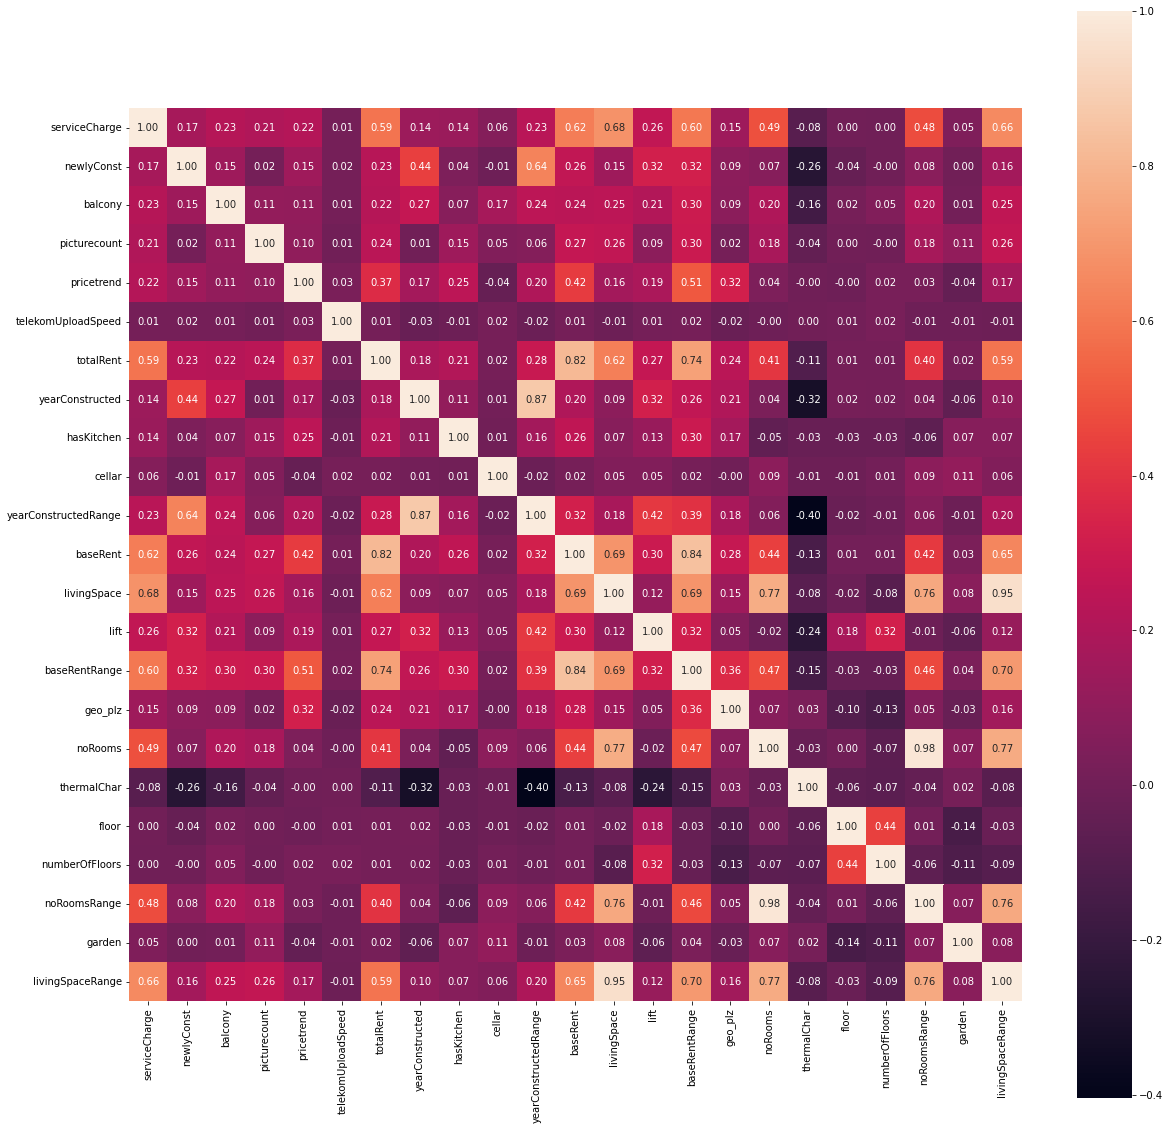

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
corr = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, square = True,fmt='.2f' ,annot = True)

# dummies variable

In [91]:
columns = []
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        columns.append(cols)
        
columns

['regio1',
 'telekomTvOffer',
 'newlyConst',
 'balcony',
 'hasKitchen',
 'cellar',
 'petsAllowed',
 'lift',
 'garden',
 'date',
 'heatingType_edit',
 'typeOfFlat_edit',
 'condition_edit',
 'interiorQual_edit']

In [92]:
dummies_feature = pd.get_dummies(df[columns])
dummies_feature.head()

,newlyConst,balcony,hasKitchen,cellar,lift,garden,regio1_Baden_Württemberg,regio1_Bayern,regio1_Berlin,regio1_Brandenburg,...,condition_edit_first_time_use,condition_edit_fully_renovated,condition_edit_mint_condition,condition_edit_modernized,condition_edit_otherCon,condition_edit_refurbished,condition_edit_well_kept,interiorQual_edit_normal,interiorQual_edit_otherCon,interiorQual_edit_sophisticated
0,False,False,False,True,False,True,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,False,True,False,False,False,False,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,True,True,False,True,True,False,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,False,True,False,False,False,False,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,False,True,False,False,False,False,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [93]:
dummies_feature.shape

(258567, 57)

In [94]:
df = pd.concat([df, dummies_feature], axis=1)
df.head()

,regio1,serviceCharge,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,...,condition_edit_first_time_use,condition_edit_fully_renovated,condition_edit_mint_condition,condition_edit_modernized,condition_edit_otherCon,condition_edit_refurbished,condition_edit_well_kept,interiorQual_edit_normal,interiorQual_edit_otherCon,interiorQual_edit_sophisticated
0,Nordrhein_Westfalen,0.308220,ONE_YEAR_FREE,False,False,-0.591717,0.628648,-1.229879e+00,-2.002236e-03,-0.033579,...,0,0,0,0,0,0,1,1,0,0
1,Rheinland_Pfalz,-0.056542,ONE_YEAR_FREE,False,True,-0.279627,0.041365,-1.229879e+00,1.060728e-14,-2.287243,...,0,0,0,0,0,1,0,1,0,0
2,Sachsen,0.341081,ONE_YEAR_FREE,True,True,-0.279627,-0.341646,-1.726934e+00,1.301498e-02,1.261079,...,1,0,0,0,0,0,0,0,0,1
3,Sachsen,-0.305795,ONE_YEAR_FREE,False,True,-0.123581,-0.949357,7.321796e-01,1.060728e-14,-0.057555,...,0,0,0,0,0,0,1,1,0,0
4,Bremen,-0.043397,ONE_YEAR_FREE,False,True,1.436871,-0.474423,-2.156249e-13,5.446935e-05,-0.393207,...,0,0,0,0,0,1,0,1,0,0


In [97]:
df = df.drop(columns=columns)
df.head()



,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,yearConstructedRange,baseRent,livingSpace,baseRentRange,...,condition_edit_first_time_use,condition_edit_fully_renovated,condition_edit_mint_condition,condition_edit_modernized,condition_edit_otherCon,condition_edit_refurbished,condition_edit_well_kept,interiorQual_edit_normal,interiorQual_edit_otherCon,interiorQual_edit_sophisticated
0,0.308220,-0.591717,0.628648,-1.229879e+00,-2.002236e-03,-0.033579,-0.705474,-0.005074,0.045708,0.106010,...,0,0,0,0,0,0,1,1,0,0
1,-0.056542,-0.279627,0.041365,-1.229879e+00,1.060728e-14,-2.287243,-1.116939,0.005419,0.057484,0.557608,...,0,0,0,0,0,1,0,1,0,0
2,0.341081,-0.279627,-0.341646,-1.726934e+00,1.301498e-02,1.261079,2.174778,0.013865,0.037072,1.009207,...,1,0,0,0,0,0,0,0,0,1
3,-0.305795,-0.123581,-0.949357,7.321796e-01,1.060728e-14,-0.057555,-0.705474,-0.017973,-0.063611,-0.797187,...,0,0,0,0,0,0,1,1,0,0
4,-0.043397,1.436871,-0.474423,-2.156249e-13,5.446935e-05,-0.393207,-1.116939,0.003628,0.041665,0.557608,...,0,0,0,0,0,1,0,1,0,0


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258567 entries, 0 to 268849
Data columns (total 68 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   serviceCharge                                    258567 non-null  float64
 1   picturecount                                     258567 non-null  float64
 2   pricetrend                                       258567 non-null  float64
 3   telekomUploadSpeed                               258567 non-null  float64
 4   totalRent                                        258567 non-null  float64
 5   yearConstructed                                  258567 non-null  float64
 6   yearConstructedRange                             258567 non-null  float64
 7   baseRent                                         258567 non-null  float64
 8   livingSpace                                      258567 non-null  float64
 9   baseRentRange  

linear regresion with all features

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
y = df['livingSpace'].values
x = df.drop(columns = ['livingSpace']).values
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=31)
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)


0.9283778779923102

# data vizualizaton

In [114]:

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [108]:
trainData = pd.read_csv('immo_data.csv')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

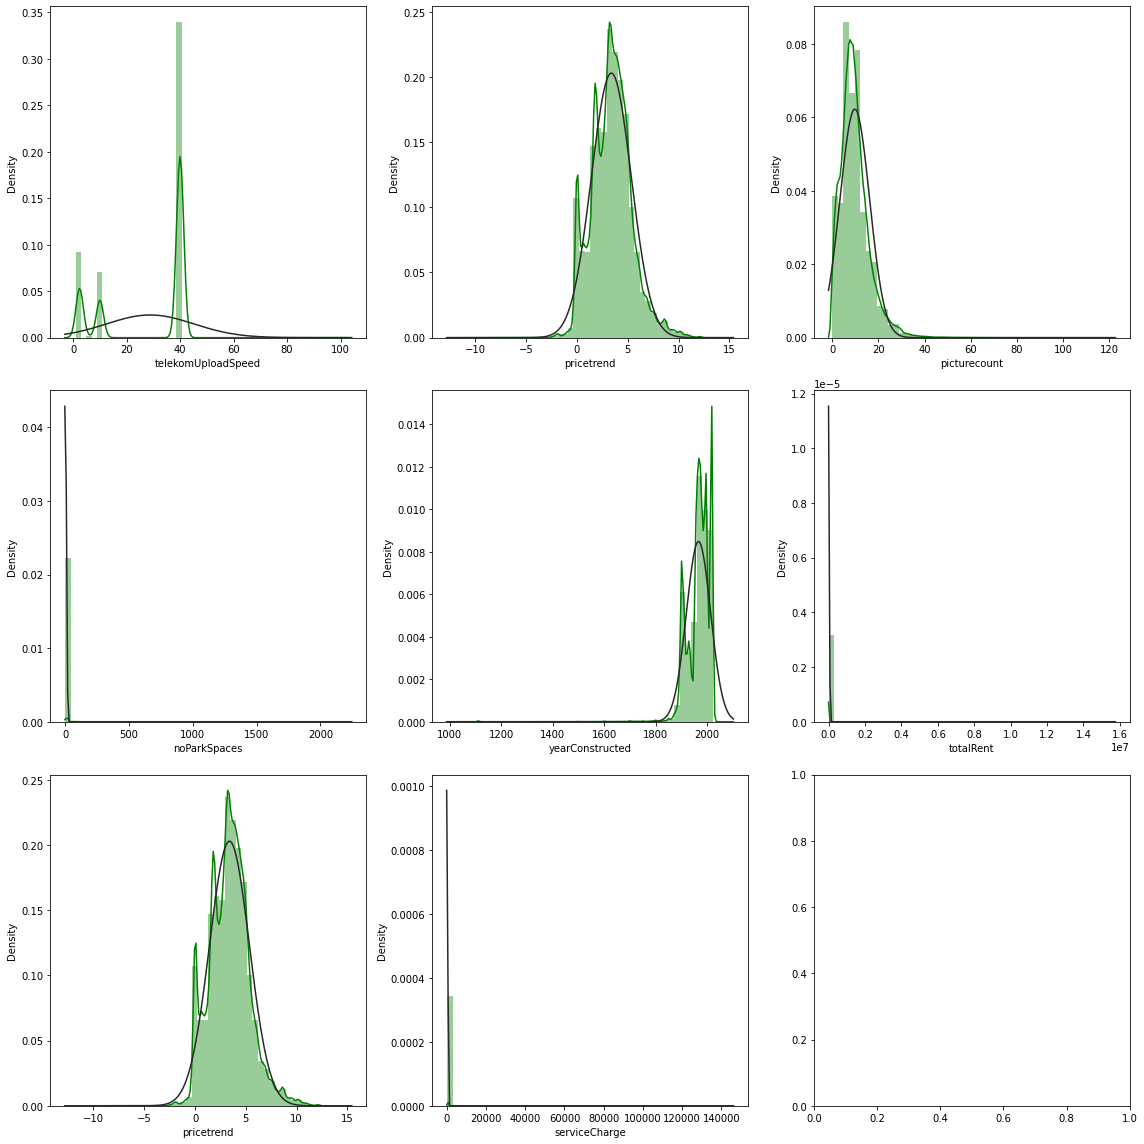

In [119]:
var2 = ['telekomUploadSpeed', 'pricetrend', 'picturecount', 'noParkSpaces', 'yearConstructed','totalRent','pricetrend','serviceCharge']
fig, ax = plt.subplots(int(np.ceil(len(var2)/3)), 3, figsize=(16,16))
ax = ax.flatten()
i = 0
for col in var2:
  skew = trainData[col].skew()
  sns.distplot(trainData[col], fit = stats.norm, ax=ax[i] , color = 'Green')
  i+=1
plt.tight_layout()
plt.show()       

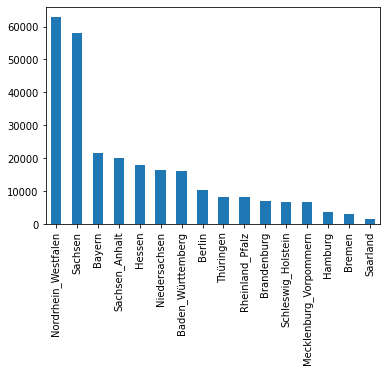

In [117]:
trainData['regio1'].value_counts().plot(kind='bar')

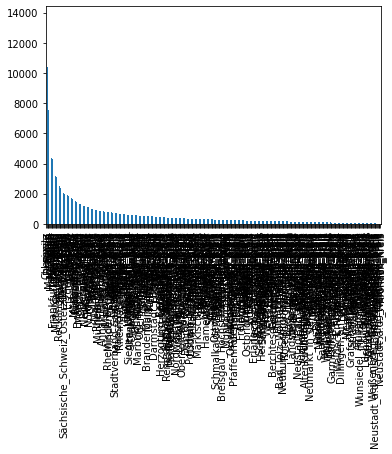

In [118]:
trainData['regio2'].value_counts().plot(kind='bar')

<function matplotlib.pyplot.show>

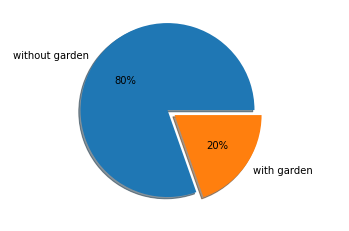

In [112]:
labels= ['without garden', 'with garden']
values=trainData['garden'].value_counts().values
plt.axis('equal')
plt.pie(values, labels=labels,autopct='%0.00f%%', explode=[0.1,0], shadow=True)
plt.show

<function matplotlib.pyplot.show>

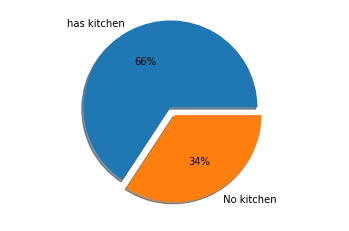

In [113]:
labels= ['has kitchen', ' No kitchen']
values=trainData['hasKitchen'].value_counts().values
plt.axis('equal')
plt.pie(values, labels=labels,autopct='%0.00f%%', explode=[0.1,0], shadow=True)
plt.show